### Import Required Packages

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


### Load Data as Dataframe

In [134]:
df = pd.read_csv('Data\Groceries_data.csv')
df.head()

<>:1: DeprecationWarning: invalid escape sequence \G
<>:1: DeprecationWarning: invalid escape sequence \G
C:\Users\keshav\AppData\Local\Temp\ipykernel_17088\1585836217.py:1: DeprecationWarning: invalid escape sequence \G
  df = pd.read_csv('Data\Groceries_data.csv')


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


### Check the data

In [135]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


convert given data to baskets

In [137]:
X = df.copy()
X = X.loc[X['itemDescription'] != 'whole milk']
X = X.groupby(['Member_number'])['itemDescription'].apply(list)
X.head()

Member_number
1000    [soda, canned beer, sausage, sausage, pickled ...
1001    [frankfurter, frankfurter, beef, sausage, soda...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
Name: itemDescription, dtype: object

Check the most popular items in Baskets

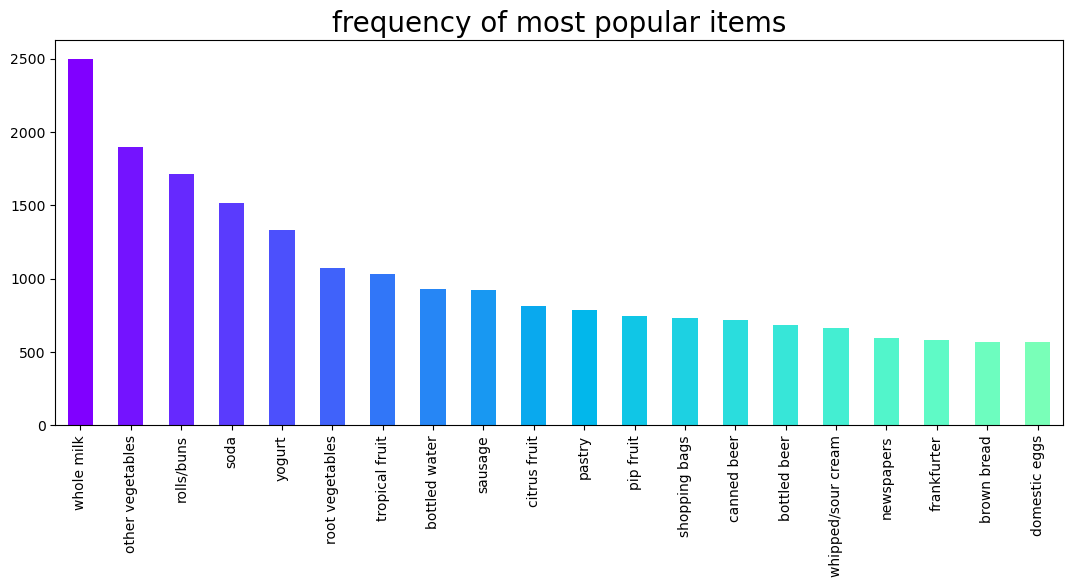

In [138]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
y = df.itemDescription.str.get_dummies(sep=', ').sum()

y.sort_values(ascending=False).head(20).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
# plt.grid()
plt.show()


Convert the Baskets to usable form

In [139]:
te = TransactionEncoder()
te_ary = te.fit(X).transform(X)
X = pd.DataFrame(te_ary, columns=te.columns_)
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


### Apply apriori algorithm
kept minimum support as 0.02 to remove non-frequent items

In [140]:
freq_items = apriori(X, min_support=0.02, use_colnames=True)
freq_items.head()

,support,itemsets
0,0.078522,(UHT-milk)
1,0.031050,(baking powder)
2,0.119579,(beef)
3,0.079805,(berries)
4,0.062099,(beverages)


### Got the rules from algorithm
Filtered the rules by applying some conditions

In [141]:
rules = association_rules(freq_items, metric = 'support', min_threshold = 0.05)
rules = rules.loc[(rules['antecedent support'] > 0.2) &
                       (rules['consequent support'] > 0.2) &
                       (rules['confidence'] > 0.3) &
                       (rules['lift'] > 1)]
rules.reset_index(inplace=True)
rules.drop(columns=['index'], inplace=True)
print(len(rules))
rules

28


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(other vegetables),0.213754,0.376700,0.093918,0.439376,1.166381,0.013397,1.111796,0.181428
1,(bottled water),(rolls/buns),0.213754,0.349756,0.079292,0.370948,1.060591,0.004530,1.033689,0.072661
2,(bottled water),(soda),0.213754,0.313575,0.076212,0.356543,1.137027,0.009185,1.066777,0.153277
3,(bottled water),(yogurt),0.213754,0.283038,0.066461,0.310924,1.098524,0.005961,1.040469,0.114071
4,(rolls/buns),(other vegetables),0.349756,0.376700,0.146780,0.419663,1.114050,0.015026,1.074030,0.157439
5,(other vegetables),(rolls/buns),0.376700,0.349756,0.146780,0.389646,1.114050,0.015026,1.065355,0.164245
6,(root vegetables),(other vegetables),0.230690,0.376700,0.094175,0.408231,1.083704,0.007274,1.053283,0.100400
7,(sausage),(other vegetables),0.206056,0.376700,0.092892,0.450809,1.196733,0.015271,1.134943,0.207057
8,(soda),(other vegetables),0.313575,0.376700,0.124198,0.396072,1.051426,0.006075,1.032077,0.071254
9,(other vegetables),(soda),0.376700,0.313575,0.124198,0.329700,1.051426,0.006075,1.024057,0.078470


### Converted the rules to baskets
Baskets are shown in output

In [142]:
baskets = [[rules.loc[i][0], rules.loc[i][1]] for i in range (0, len(rules))]
baskets = [frozenset().union(*i) for i in baskets]
# baskets = [[list(x) for x in i] for i in baskets]
# baskets = [frozenset(i[0] + i[1]) for i in baskets]
baskets = set(baskets)
baskets = [list(i) for i in baskets]

